# 3. Visualization of Amino Acid Composition Profile

In [52]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = "combined_fasta_data.csv"
pre_df = pd.read_csv(file_path)

# Calculate protein length and add it to a new column in the data frame
pre_df['Protein_Length'] = pre_df['Sequence'].apply(len)

# Filter protein length from 50 to 200
df = pre_df[(pre_df['Protein_Length'] >= 50) & (pre_df['Protein_Length'] <= 200)]

# testing
df.head()

,Header,Sequence,Species,Protein_Length
4,XP_005534768.1 hypothetical protein CYME_CMJ01...,MPTESGLQQRWRRGCAGGAGPQWWPPGRKPHGAGGTMPQPPTRDAP...,Cyanidioschyzon,191
22,XP_005534786.1 cytochrome c oxidase subunit VI...,MATRHMLWMLGRYIRKVPLGRLGDSARARALSSSAARGHASSSHVA...,Cyanidioschyzon,128
43,"XP_005534807.1 hypothetical protein, conserved...",MTEASENIVVVPSEVQSSKLRACLSCGLVKSVAQFLAYGCENCPGL...,Cyanidioschyzon,118
50,XP_005534814.1 hypothetical protein CYME_CMJ06...,MPVSLKRLQARQERVASGLERKVTRVTSKGPKAKGVQSKNLNPYLV...,Cyanidioschyzon,75
68,XP_005534832.1 hypothetical protein CYME_CMJ08...,MPYYETLMLIDSRLGRGELHELLKRIVLRFMDAGGIVTRLRALPSA...,Cyanidioschyzon,200


In [53]:
import pandas as pd

# Create a list of all 20 standard amino acids
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# Function to calculate amino acid percentages
def calculate_aa_percentage(sequence):
    length = len(sequence)
    aa_counts = {aa: sequence.count(aa) / length * 100 for aa in amino_acids}
    return aa_counts

# Apply the function to the 'Sequence' column and create a new DataFrame
aa_percentage_df = df['Sequence'].apply(calculate_aa_percentage).apply(pd.Series)

aa_perc_seq_df = pd.concat([df[['Sequence', 'Species', 'Protein_Length']], aa_percentage_df], axis=1)

aa_perc_seq_df.to_csv("amino_acid_percentage_data.csv", index=False)

aa_perc_seq_df.head()



,Sequence,Species,Protein_Length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
4,MPTESGLQQRWRRGCAGGAGPQWWPPGRKPHGAGGTMPQPPTRDAP...,Cyanidioschyzon,191,13.089005,2.094241,3.141361,9.424084,2.094241,7.329843,1.047120,...,1.047120,2.094241,9.947644,5.235602,12.565445,9.424084,5.235602,3.664921,2.617801,0.523560
22,MATRHMLWMLGRYIRKVPLGRLGDSARARALSSSAARGHASSSHVA...,Cyanidioschyzon,128,12.500000,0.000000,3.125000,5.468750,2.343750,7.812500,7.812500,...,3.125000,1.562500,9.375000,0.781250,10.937500,8.593750,3.125000,3.906250,3.906250,3.125000
43,MTEASENIVVVPSEVQSSKLRACLSCGLVKSVAQFLAYGCENCPGL...,Cyanidioschyzon,118,9.322034,4.237288,3.389831,10.169492,4.237288,6.779661,0.000000,...,0.847458,1.694915,4.237288,2.542373,5.932203,8.474576,4.237288,11.016949,1.694915,2.542373
50,MPVSLKRLQARQERVASGLERKVTRVTSKGPKAKGVQSKNLNPYLV...,Cyanidioschyzon,75,8.000000,0.000000,0.000000,4.000000,5.333333,9.333333,1.333333,...,2.666667,2.666667,5.333333,5.333333,8.000000,6.666667,2.666667,10.666667,0.000000,2.666667
68,MPYYETLMLIDSRLGRGELHELLKRIVLRFMDAGGIVTRLRALPSA...,Cyanidioschyzon,200,10.500000,1.000000,2.500000,8.500000,4.000000,7.000000,2.500000,...,2.500000,0.500000,10.500000,3.500000,11.500000,4.500000,6.000000,5.500000,0.000000,2.500000


In [54]:
def calculate_avg_aa_percentage_by_length(df):
    # Group by Protein_Length and calculate the mean for each amino acid column
    grouped_df = df.groupby('Protein_Length').mean(numeric_only=True)
    return grouped_df

aa_perc_seq_df_groupedbylength = calculate_avg_aa_percentage_by_length(aa_perc_seq_df)

aa_perc_seq_df_groupedbylength.head(10)

aa_profile = aa_perc_seq_df_groupedbylength.reset_index('Protein_Length')

aa_profile.head()

,Protein_Length,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,50,5.333333,2.000000,4.358974,6.205128,5.589744,5.435897,2.974359,5.333333,4.974359,...,4.153846,3.333333,4.410256,3.743590,6.410256,8.820513,4.666667,6.564103,2.256410,3.435897
1,51,5.744754,3.302374,2.923977,3.233574,3.852769,6.467148,2.958376,5.366357,8.187135,...,4.368765,2.992776,4.884761,4.162367,10.698314,5.882353,4.609563,4.953560,1.995184,4.299966
2,52,5.199430,5.733618,1.816239,3.917379,4.558405,9.259259,1.958689,5.626781,6.623932,...,3.668091,3.418803,3.988604,3.383191,6.196581,7.834758,4.878917,5.413105,1.388889,5.626781
3,53,6.305859,2.581927,3.674280,4.468719,5.561072,6.007944,2.830189,5.561072,6.951341,...,4.419067,3.475670,4.518371,2.730884,6.554121,8.987090,4.766634,5.213505,1.042701,3.128103
4,54,9.090909,3.249158,3.249158,4.545455,4.006734,8.316498,2.340067,3.905724,5.151515,...,3.922559,2.727273,5.000000,4.006734,7.861953,7.693603,4.713805,5.909091,1.649832,3.063973


In [55]:
# change the wide data frame into a "tidy", long data frame as seaborn prefers this type of data frame

aa_profile_melted = aa_profile.melt(
    id_vars='Protein_Length',
    var_name='Amino_Acid', 
    value_name='Percentage')

aa_profile_melted.to_csv("amino_acid_profile.csv", index=False)
aa_profile_melted.head()

,Protein_Length,Amino_Acid,Percentage
0,50,A,5.333333
1,51,A,5.744754
2,52,A,5.199430
3,53,A,6.305859
4,54,A,9.090909


# 3.1　Scatter plot

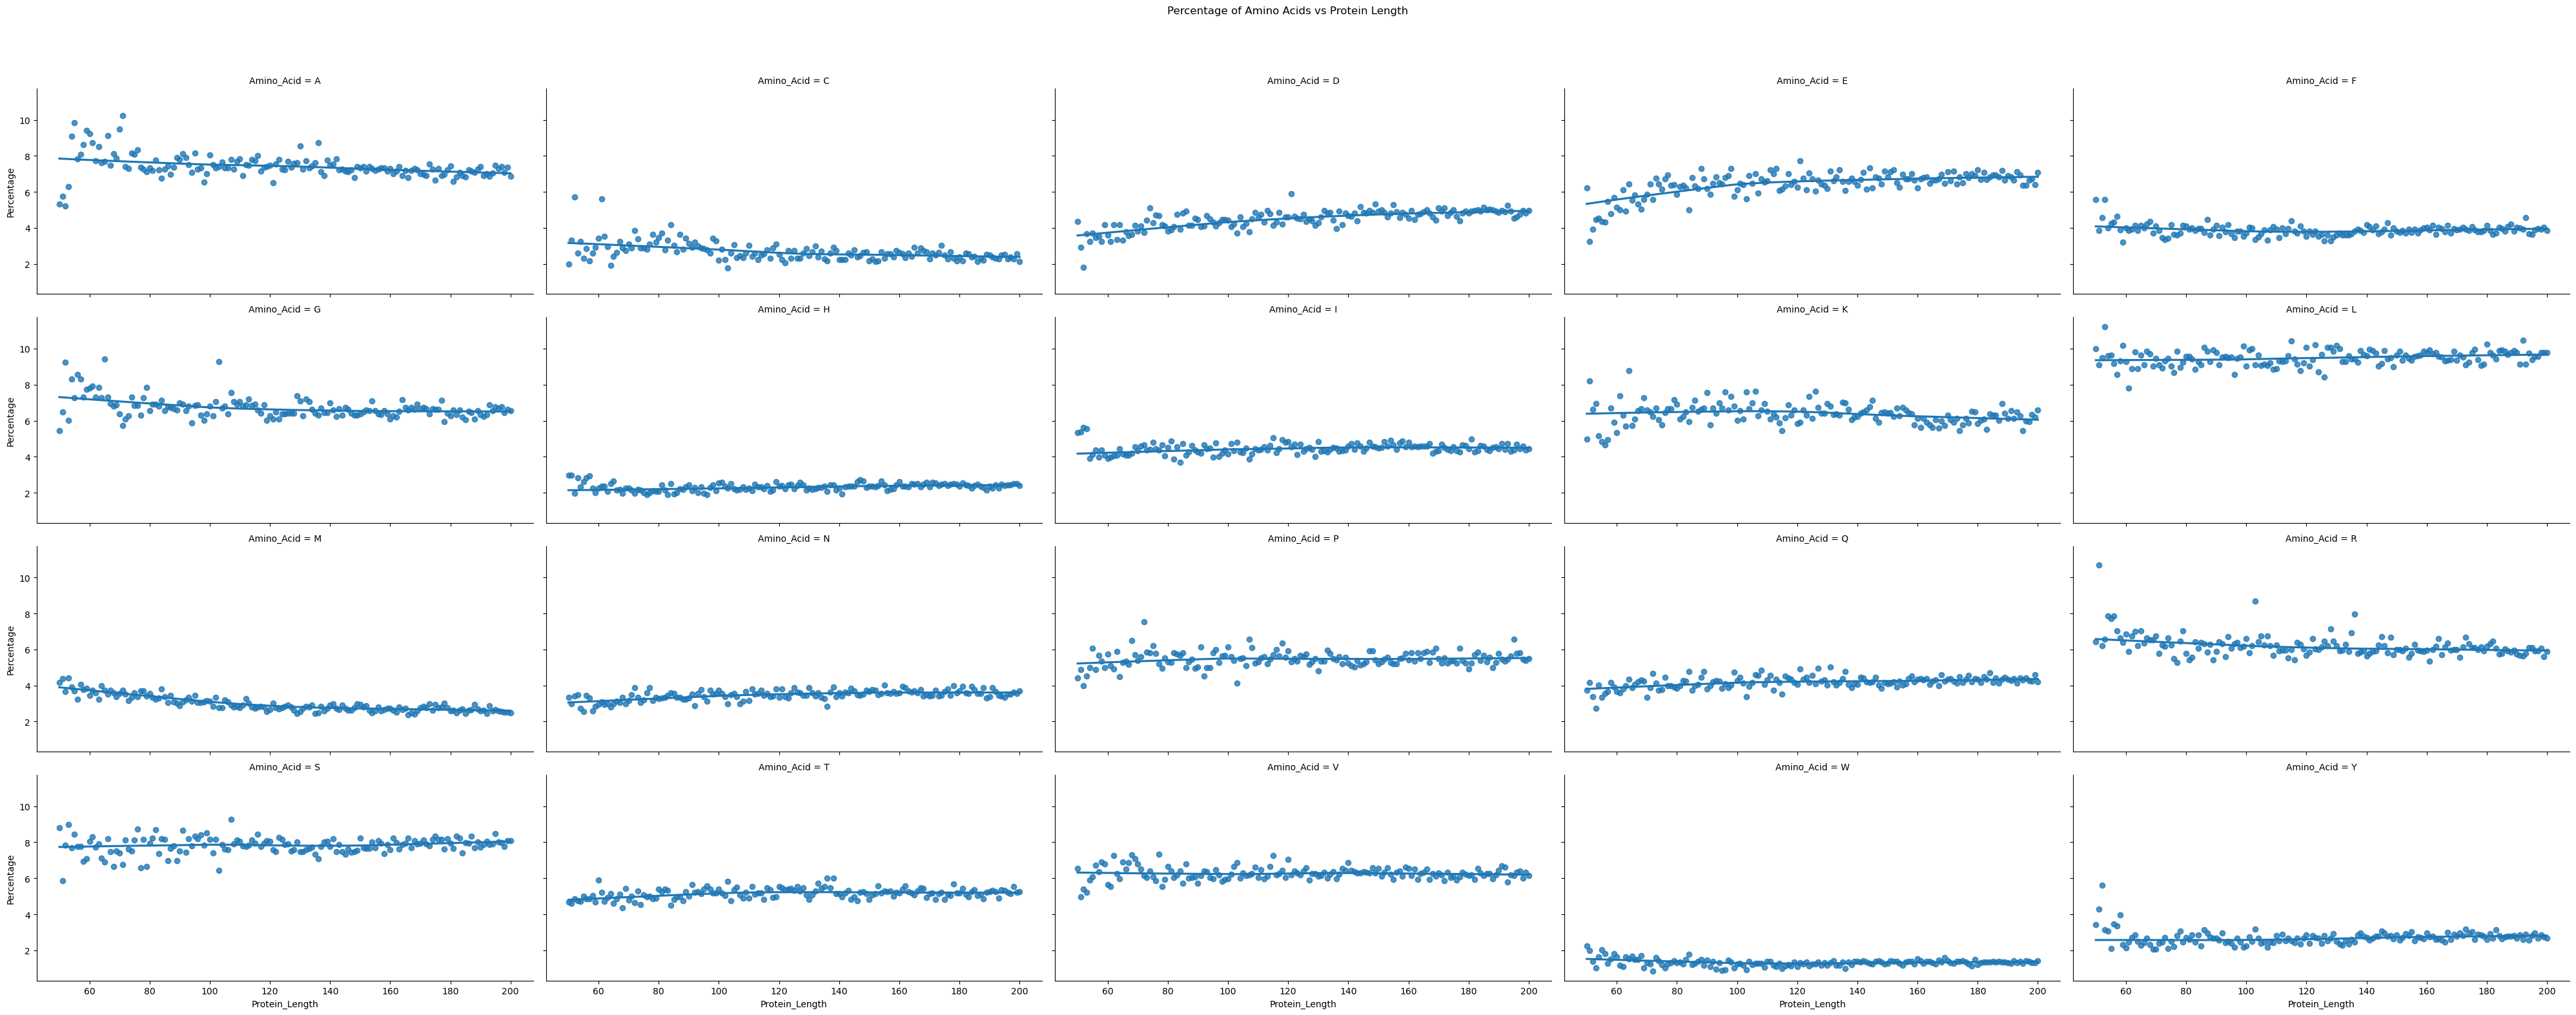

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the lmplot
g = sns.lmplot(
    data=aa_profile_melted,
    x='Protein_Length',
    y='Percentage',
    col='Amino_Acid',
    col_wrap=5,
    lowess=True,
    fit_reg=True,
    height=4,  # Size of each facet
    aspect=2 # Aspect ratio
)

# Adjust the layout for better spacing
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Percentage of Amino Acids vs Protein Length')

plt.show()

# 3.2 Heat maps

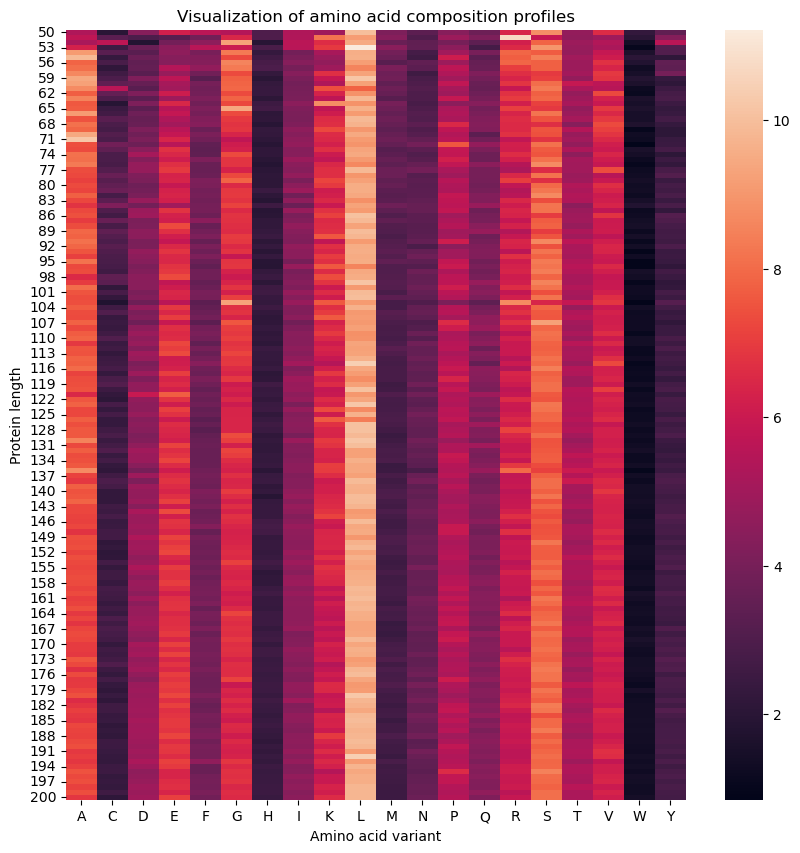

In [57]:
aa_profile_forheatmap = aa_profile.set_index('Protein_Length')

plt.figure(figsize=(10,10))

sns.heatmap(data=aa_profile_forheatmap)

plt.title("Visualization of amino acid composition profiles")
plt.ylabel("Protein length")
plt.xlabel("Amino acid variant")
plt.show()

In [62]:
aa_profile_forheatmap.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Protein_Length,,,,,,,,,,,,,,,,,,,,
50,5.333333,2.000000,4.358974,6.205128,5.589744,5.435897,2.974359,5.333333,4.974359,10.000000,4.153846,3.333333,4.410256,3.743590,6.410256,8.820513,4.666667,6.564103,2.256410,3.435897
51,5.744754,3.302374,2.923977,3.233574,3.852769,6.467148,2.958376,5.366357,8.187135,9.115927,4.368765,2.992776,4.884761,4.162367,10.698314,5.882353,4.609563,4.953560,1.995184,4.299966
52,5.199430,5.733618,1.816239,3.917379,4.558405,9.259259,1.958689,5.626781,6.623932,9.508547,3.668091,3.418803,3.988604,3.383191,6.196581,7.834758,4.878917,5.413105,1.388889,5.626781
53,6.305859,2.581927,3.674280,4.468719,5.561072,6.007944,2.830189,5.561072,6.951341,11.221450,4.419067,3.475670,4.518371,2.730884,6.554121,8.987090,4.766634,5.213505,1.042701,3.128103
54,9.090909,3.249158,3.249158,4.545455,4.006734,8.316498,2.340067,3.905724,5.151515,9.595960,3.922559,2.727273,5.000000,4.006734,7.861953,7.693603,4.713805,5.909091,1.649832,3.063973


# 3.3 Hierarchial clustering

Text(941.9027777777777, 0.5, 'Protein length')

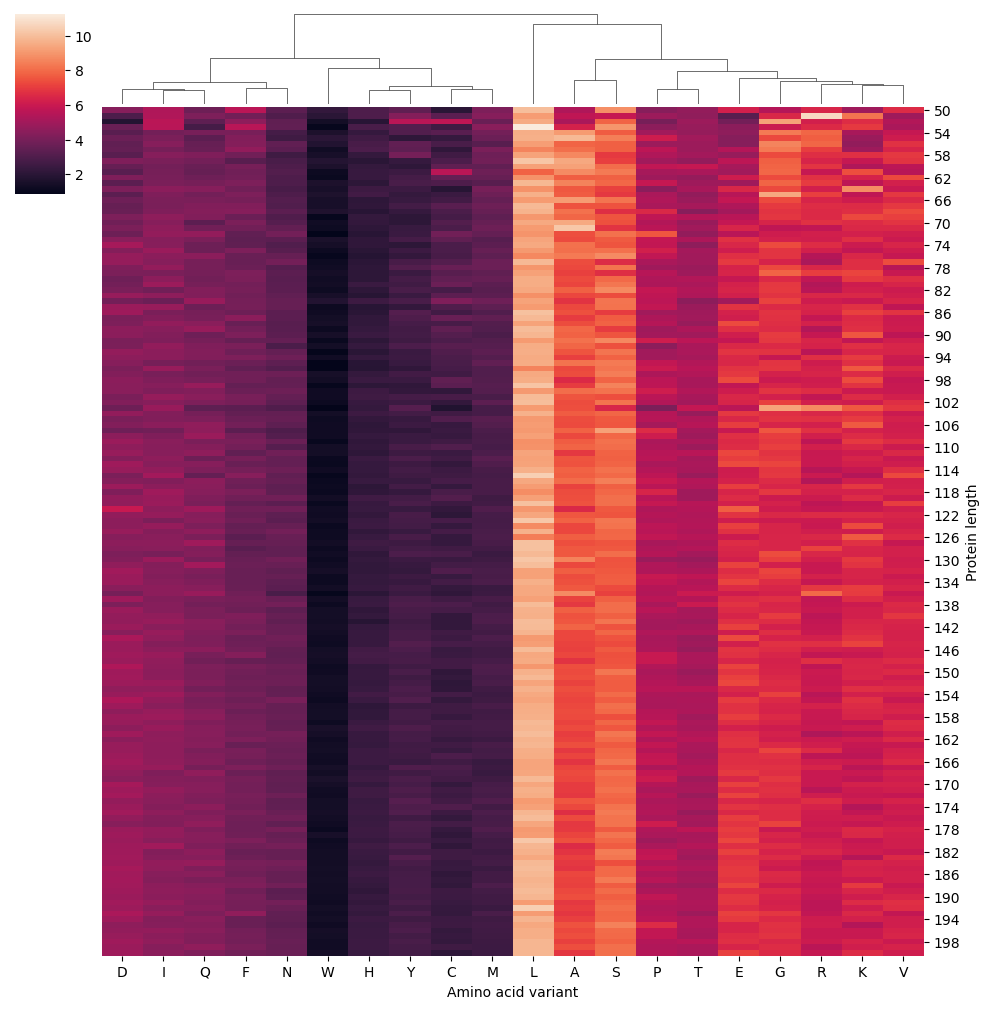

In [58]:
clustermap = sns.clustermap(
    aa_profile_forheatmap,
    row_cluster=False,
    # figsize=(10,20),
    dendrogram_ratio=(0.1, 0.1)
    )

clustermap.ax_heatmap.set_xlabel("Amino acid variant")
clustermap.ax_heatmap.set_ylabel("Protein length")

# 3.4 Principal component analysis

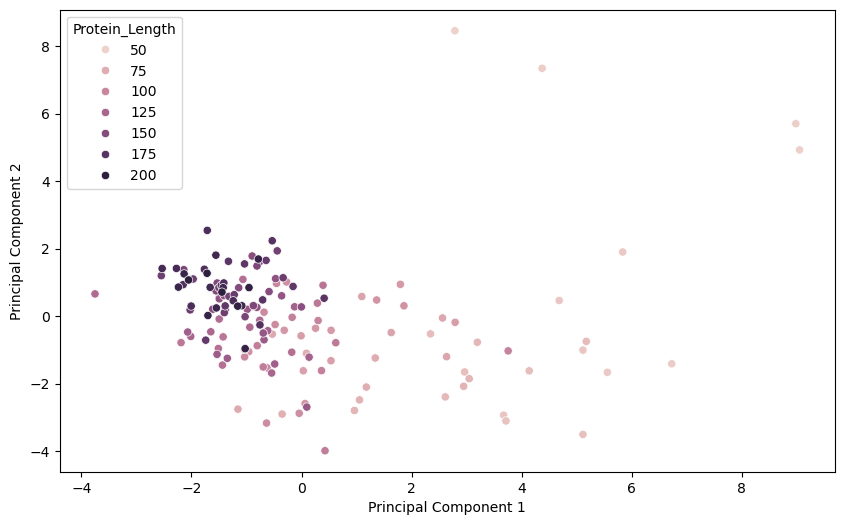

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = aa_profile

# standardize the data
features = data.drop("Protein_Length", axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# create data frame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["Protein_Length"] = data["Protein_Length"]

# plot the PCA results
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Protein_Length")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()